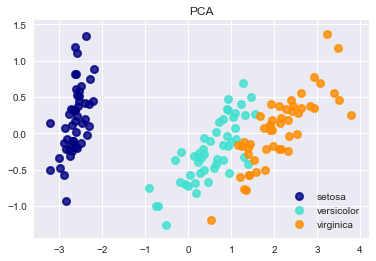

In [3]:
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']

X = []
Y = []

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=2, label=target_name)
    X.extend(X_r[y==i,0])
    Y.extend(X_r[y==i,1])

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')


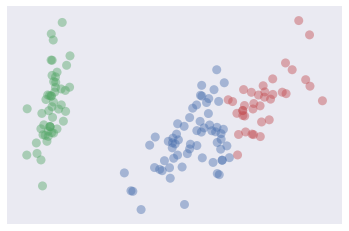

In [4]:
import sklearn.cluster as cluster
import seaborn as sns
import numpy as np

plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

def plot_clusters(data, algorithm, args, kwds):
    labels = algorithm(*args, **kwds).fit_predict(data)
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    return labels
    
plot_clusters(X_r ,cluster.AgglomerativeClustering, (), {'n_clusters':3, 'linkage':'ward'})

resultado = plot_clusters(X_r ,cluster.AgglomerativeClustering, (), {'n_clusters':3, 'linkage':'ward'})

In [13]:
from sklearn.metrics import confusion_matrix
import pandas as pd

y_ = y

for i in range(len(y)):
    if y_[i] == 1:
        y_[i] = 0
    elif y_[i] == 0:
        y_[i] = 1
    else:
        y_[i] = 2
        
print(y_)
print(resultado)

c = confusion_matrix(y_, resultado, labels = [0,1, 2])
#print(c)
pd.DataFrame(c, index = ['versicolor','setosa', 'virginica' ], columns =['versicolor','setosa', 'virginica' ])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


,versicolor,setosa,virginica
versicolor,49,0,1
setosa,0,50,0
virginica,14,0,36
